In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size
sns.set(rc={'figure.figsize':(16,10)})

#Load data
df  = pd.read_csv(os.path.join('data','data_all.csv'))
df2 = pd.read_csv(os.path.join('data','data_filtered.csv'))

#Enable CUDA
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

df

In [6]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(rc={'figure.figsize':(16,10)})
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


df = pd.read_csv(os.path.join('data','voice.csv'))
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [15]:
train_x = torch.tensor(
    [[0, 0], [0, 1], [1, 0], [1, 1]],
    dtype=torch.float32, device=device)

train_y = torch.tensor(
    [[0], [1], [1], [0]],
    dtype=torch.float32, device=device)

test_x = torch.tensor(
    [[1, 1]],
    dtype=torch.float32, device=device)

test_y = torch.tensor(
    [[0]],
    dtype=torch.float32, device=device)

2000 0.03842765837907791
4000 0.005385978147387505
6000 0.001309103798121214
8000 0.0003793711948674172
10000 0.00011827841808553785
[tensor(0.6932, device='cuda:0')]


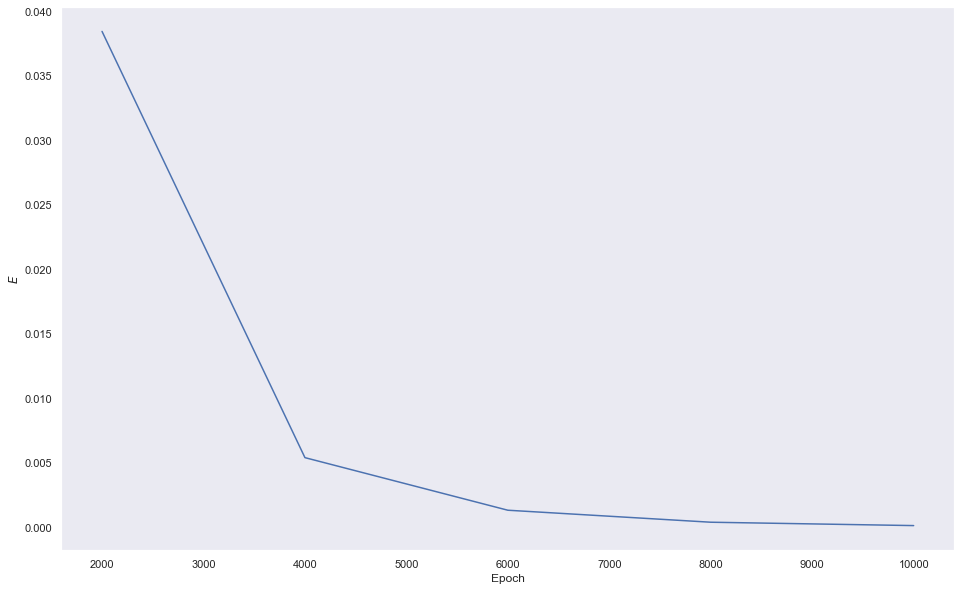

In [28]:
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = torch.nn.Linear(input_size, hidden_size, device=device)
        self.relu = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(hidden_size, num_classes, device=device)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out  # Return logits

    def train(self, train_x, train_y,
              epochs, interval=100):

        # Initalise optimiser

        #optimiser = torch.optim.SGD(model.parameters(),lr=0.1)
        optimiser = torch.optim.Adam(model.parameters())

        history = []  # Save error loss over time

        # Training and testing loop
        for step in range(1, epochs+1):

            # Train
            optimiser.zero_grad()
            output = self.__call__(train_x)
            error = torch.nn.functional.binary_cross_entropy_with_logits(
                output, train_y)
            error.backward()
            optimiser.step()

            # Print to standard output
            if interval > 0 and step % interval == 0:
                print(step, error.detach().tolist())
                history.append((step,error.tolist()))

        return pd.DataFrame(history, columns=['Epoch', 'Train Loss'])

    def test(self, test_x, test_y):
        error = []
        with torch.no_grad():
            outputs = torch.sigmoid(self.__call__(test_x))
            for (x, pred, actual) in zip(test_x, outputs,test_y):
                error.append(
                    torch.nn.functional.binary_cross_entropy_with_logits(
                        pred, actual)
                )
        return error

    def train_and_test(self, train_x, train_y, test_x, test_y,
                       epochs, interval=100):

        # Initalise optimiser

        #optimiser = torch.optim.SGD(model.parameters(),lr=0.1)
        optimiser = torch.optim.Adam(model.parameters())

        history = []  # Save error loss over time

        # Training and testing loop
        for step in range(1, epochs+1):

            # Train
            optimiser.zero_grad()
            train_output = self.__call__(train_x)
            train_error = torch.nn.functional.binary_cross_entropy_with_logits(
                train_output, train_y)
            train_error.backward()
            optimiser.step()

            # Test
            with torch.no_grad():

                outputs = torch.sigmoid(self.__call__(test_x))
                for (x, pred, actual) in zip(test_x, outputs, test_y):
                    if interval > 0 and step % interval == 0:
                        print(pred, actual)

                    test_error = torch.nn.functional.binary_cross_entropy_with_logits(
                        pred, actual)

            # Print to standard output
            if interval > 0 and step % interval == 0:
                print(
                    f'{step}:\tTrain: {round(train_error.detach().tolist(),3)}\tTest: {round(test_error.detach().tolist(),3)}')
                history.append(
                    (step, train_error.tolist(), test_error.tolist()))

        return pd.DataFrame(history, columns=['Epoch', 'Train Loss', 'Test Loss'])


# Initialise model
model = Model(2, 10, 1)
model.to(device)

# Training
# history = model.train_and_test(train_x, train_y, test_x, test_y,
#                                epochs=1000, interval=100)

history = model.train(train_x,train_y,epochs=10_000, interval=2000)
print(model.test(test_x,test_y))


(fig, ax) = plt.subplots(1, 1)
sns.lineplot(data=history, x='Epoch', y='Train Loss')
# sns.lineplot(data=history, x='Epoch', y='Test Loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('$E$')
# ax.plot(range(1, len(history) + 1), history, linestyle='-', linewidth=3)

ax.grid()


##Why is the error high??

In [42]:
test_y

tensor([[190.],
        [210.],
        [ 54.],
        [268.],
        [162.]], device='cuda:0')

In [ ]:
error.tolist()